In [1]:
#import Tensorflow and tf.keras
import tensorflow as tf

#import helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [2]:


fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#60000 images represented as 28x28 pixels

train_images.shape

(60000, 28, 28)

In [5]:
#60000 labels in the training set

len(train_labels)

60000

In [6]:
#each integer is label between 0 and 9

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
#10000 images in test set and they are 28x28 pixels

test_images.shape

(10000, 28, 28)

In [8]:
#10000 labels in the test set

len(test_labels)

10000

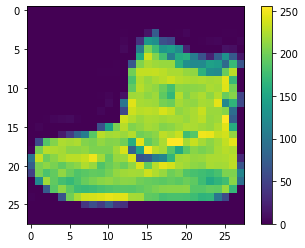

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

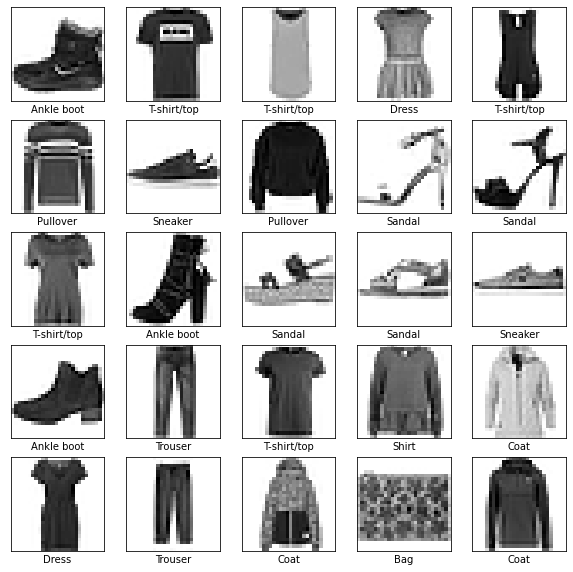

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4981 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3738 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3330 - accuracy: 0.8791
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3072 - accuracy: 0.8878
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2903 - accuracy: 0.8933
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2776 - accuracy: 0.8982
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2539 - accuracy: 0.9062
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2460 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3252 - accuracy: 0.8852 - 490ms/epoch - 2ms/step

Test accuracy: 0.885200023651123


In [16]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([5.3002468e-06, 1.0685365e-10, 5.6784064e-08, 8.8510860e-10,
       1.4975589e-08, 3.3872898e-04, 1.9543461e-06, 5.9077973e-03,
       3.0208122e-07, 9.9374580e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
#Graph

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

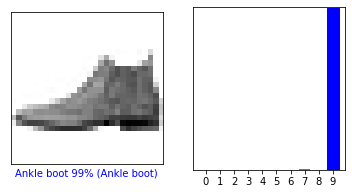

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

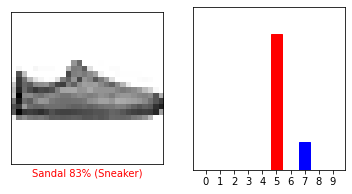

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

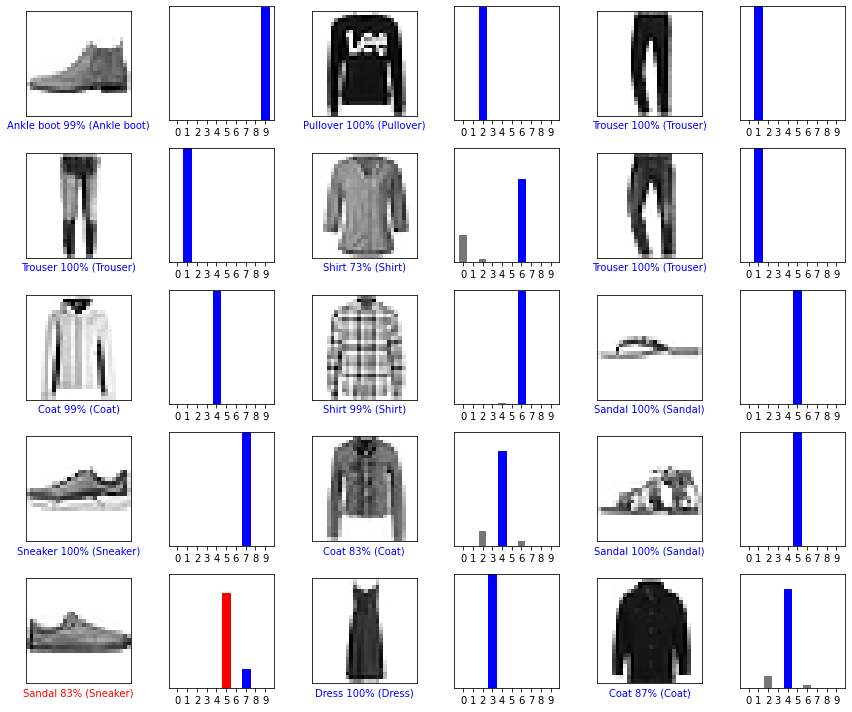

In [24]:
#Plot several images with their predictions.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [25]:
# Grab an image from the test dataset.

img = test_images[1]

print(img.shape)

(28, 28)


In [26]:
# Add the image to a batch where it's the only member.

img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [27]:
#Now predict the correct label for this image:

predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.56809037e-05 1.32732115e-11 9.98280644e-01 1.07477707e-10
  1.47826935e-03 5.18195001e-11 2.25360025e-04 5.20761315e-18
  7.25023904e-12 4.49252452e-14]]


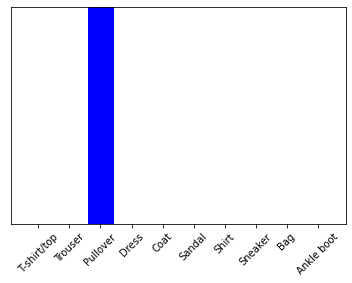

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [30]:
np.argmax(predictions_single[0])

2